In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE


In [ ]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
print(df.head())


      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [ ]:
df = df.drop("id", axis=1)


In [ ]:
df["bmi"].fillna(df["bmi"].mean(), inplace=True)


/tmp/ipython-input-2387387978.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["bmi"].fillna(df["bmi"].mean(), inplace=True)


In [ ]:
le = LabelEncoder()

df["gender"] = le.fit_transform(df["gender"])
df["ever_married"] = le.fit_transform(df["ever_married"])
df["work_type"] = le.fit_transform(df["work_type"])
df["Residence_type"] = le.fit_transform(df["Residence_type"])
df["smoking_status"] = le.fit_transform(df["smoking_status"])


In [ ]:
X = df.drop("stroke", axis=1)
y = df["stroke"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
sm = SMOTE(random_state=42)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: stroke
0    3889
1     199
Name: count, dtype: int64
After SMOTE: stroke
0    3889
1    3889
Name: count, dtype: int64


In [ ]:
model = LogisticRegression()

model.fit(X_train_res, y_train_res)


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

TN, FP, FN, TP = cm.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0

print(f"\nAccuracy: {accuracy * 100:.2f}%")
print(f"Sensitivity (Recall): {sensitivity * 100:.2f}%")
print(f"Specificity: {specificity * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"F1-Score: {f1_score * 100:.2f}%")


Confusion Matrix:
 [[737 235]
 [ 10  40]]

Accuracy: 76.03%
Sensitivity (Recall): 80.00%
Specificity: 75.82%
Precision: 14.55%
F1-Score: 24.62%


In [ ]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.76      0.86       972
           1       0.15      0.80      0.25        50

    accuracy                           0.76      1022
   macro avg       0.57      0.78      0.55      1022
weighted avg       0.95      0.76      0.83      1022



In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train_res, y_train_res)


RandomForestClassifier(class_weight='balanced')

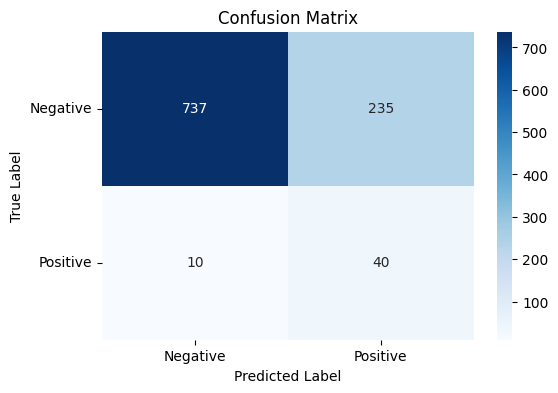

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels to the x-axis for predicted classes
plt.xlabel('Predicted Label')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])

# Add labels to the y-axis for true classes
plt.ylabel('True Label')
plt.yticks([0.5, 1.5], ['Negative', 'Positive'], rotation=0)

# Add a title to the heatmap
plt.title('Confusion Matrix')

# Display the plot
plt.show()

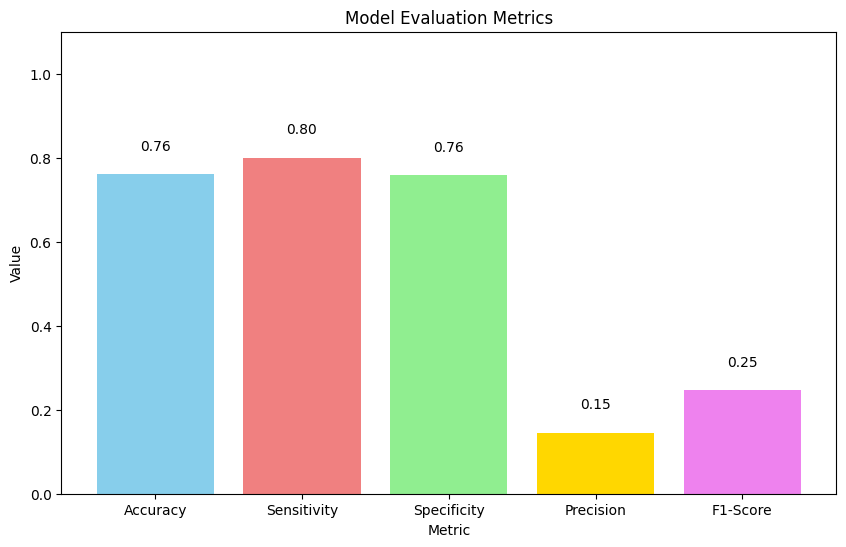

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for the bar chart
metrics_names = ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1-Score']
metrics_values = [accuracy, sensitivity, specificity, precision, f1_score]

# Create a bar chart for the evaluation metrics
plt.figure(figsize=(10, 6))
plt.bar(metrics_names, metrics_values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'violet'])

# Add labels and title
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1.1) # Set y-axis limit from 0 to 1.1 for better visualization of scores

# Add value labels on top of each bar
for i, value in enumerate(metrics_values):
    plt.text(i, value + 0.05, f'{value:.2f}', ha='center', va='bottom')

# Display the plot
plt.show()